In [926]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [927]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [928]:
for i in range(data.shape[0]):
    if data.loc[i, 'price_change'] == -1:
        data.loc[i, 'price_change'] = 0

In [929]:
target = 'price_change'

train = data.sample(frac=0.8, random_state=1)
test = data.drop(train.index).sample(frac=1.0, random_state=1)

y_train = train[target]
x_train = train.drop(columns=target)

y_test = test[target]
x_test = test.drop(columns=target)

In [930]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [931]:
import tensorflow as tf

modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.InputLayer(x_train.shape[1]))
modelo.add(tf.keras.layers.Dense(20))
modelo.add(tf.keras.layers.Dense(50))
modelo.add(tf.keras.layers.Dense(2, activation='sigmoid'))

modelo.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_266 (Dense)           (None, 20)                27920     
                                                                 
 dense_267 (Dense)           (None, 50)                1050      
                                                                 
 dense_268 (Dense)           (None, 2)                 102       
                                                                 
Total params: 29,072
Trainable params: 29,072
Non-trainable params: 0
_________________________________________________________________


In [932]:
modelo.compile(optimizer='adam',
               loss='mean_squared_error',
               metrics=['accuracy'])

In [933]:
epoch = 500
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       epochs=epoch)

Epoch 1/500
5/5 [==============================] - 1s 44ms/step - loss: 0.2662 - accuracy: 0.5633 - val_loss: 0.2581 - val_accuracy: 0.6750
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 0.2013 - accuracy: 0.5380 - val_loss: 0.2486 - val_accuracy: 0.6750
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1613 - accuracy: 0.5380 - val_loss: 0.2584 - val_accuracy: 0.7500
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1101 - accuracy: 0.5253 - val_loss: 0.2380 - val_accuracy: 0.7250
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.5316 - val_loss: 0.2435 - val_accuracy: 0.6750
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0395 - accuracy: 0.5253 - val_loss: 0.2437 - val_accuracy: 0.7000
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.5190 - val_loss: 0.2309 - val_accuracy: 0.7250
Epoch 8/500
5/5 [========

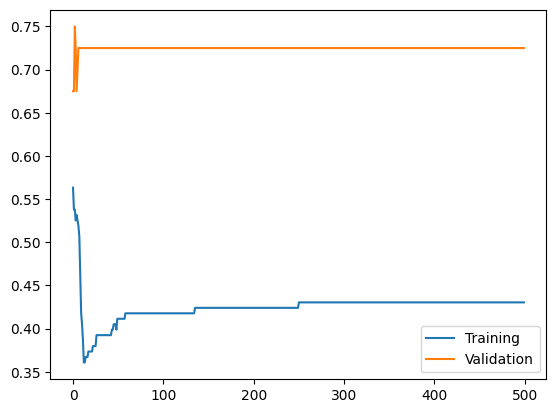

In [934]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

plt.plot(range(epoch), acc, label='Training')
plt.plot(range(epoch), val_acc, label='Validation')
plt.legend(loc='lower right')

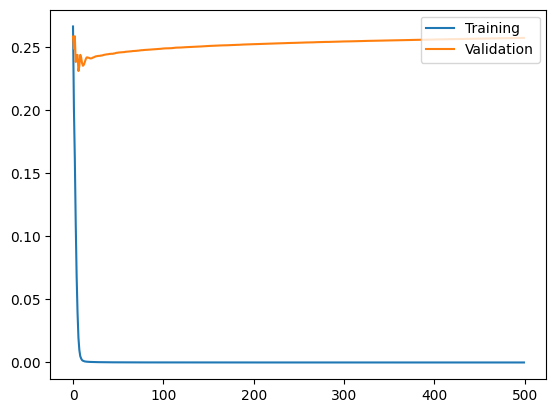

In [935]:
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(epoch), loss, label='Training')
plt.plot(range(epoch), val_loss, label='Validation')
plt.legend(loc='upper right')

2/2 [==============================] - 0s 2ms/step


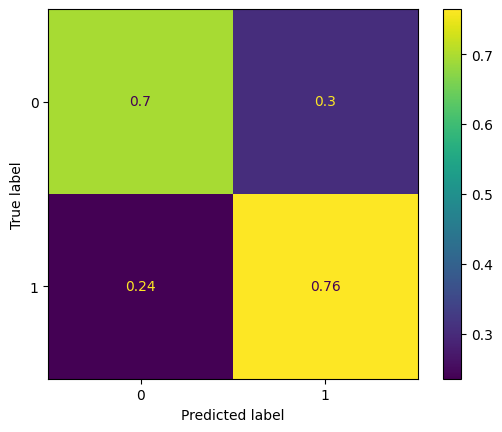

In [936]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(x_test)
cf = confusion_matrix(y_test, list(map(np.argmax, y_pred)), normalize='true')
ConfusionMatrixDisplay(cf).plot()